## Obtener datos de los satélites
Se incializa la librería

In [1]:
import ee
import geemap
import geopandas as gpd
from ipyleaflet import GeoJSON
from zipfile import ZipFile
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from extract_data import *

ee.Authenticate()
ee.Initialize()

Enter verification code:  4/1AWtgzh7czKvv7LjTTd1ioM97tIqeYXpHJkLqBoiBTSmDAKqHeGCFyaamblk



Successfully saved authorization token.


# Creacion de los diccionarios que contienen la información

In [2]:
#region de interes---------------------------------------------------------------------
region = ee.Geometry.Rectangle(-74.638, 3.571, -73.710, 5.057)

#extracción de datos-------------------------------------------------------------------
ERA5_radiacion = {
    'source' : 'ECMWF/ERA5_LAND/MONTHLY_AGGR',
    'variable' : 'Radiación solar superficial neta mensual',
    'band' : 'surface_net_solar_radiation_sum',
    'units' : ' [ J/m2 ]',
    'max_value' : 430e6,
    'min_value' : 350e6,
    'start' : '1990-01-01',
    'end' : '2022-12-01'
}

ERA5_velu = {
    'source' : 'ECMWF/ERA5_LAND/MONTHLY_AGGR',
    'variable' : 'Componente x de velocidad',
    'band' : 'u_component_of_wind_10m',
    'units' : ' [ m/s ]',
    'max_value' : -2,
    'min_value' : 2,
    'start' : '1990-01-01',
    'end' : '2022-12-01'
}

ERA5_velv = {
    'source' : 'ECMWF/ERA5_LAND/MONTHLY_AGGR',
    'variable' : 'Componente y de velocidad',
    'band' : 'v_component_of_wind_10m',
    'units' : ' [ m/s ]',
    'max_value' : -2,
    'min_value' : 2,
    'start' : '1990-01-01',
    'end' : '2022-12-01'
}

ERA5_precipitacion = {
    'source' : 'ECMWF/ERA5_LAND/MONTHLY_AGGR',
    'variable' : 'Precipitación (lluvia y nieve)',
    'band' : 'total_precipitation_sum',
    'units' : ' [ mm ]',
    'max_value' : -2,
    'min_value' : 2,
    'start' : '1990-01-01',
    'end' : '2022-12-01'
}

ERA5_presion = {
    'source' : 'ECMWF/ERA5_LAND/MONTHLY_AGGR',
    'variable' : 'Presión de la atmósfera sobre la superficie de la tierra',
    'band' : 'surface_pressure',
    'units' : ' [ Pa ]',
    'max_value' : -2,
    'min_value' : 2,
    'start' : '1990-01-01',
    'end' : '2022-12-01'
}

ERA5_temp_2m = {
    'source' : 'ECMWF/ERA5_LAND/MONTHLY_AGGR',
    'variable' : 'Temperatura del aire a 2 m por encima de la superficie de la tierra',
    'band' : 'temperature_2m',
    'units' : ' [ K ]',
    'max_value' : -2,
    'min_value' : 2,
    'start' : '1990-01-01',
    'end' : '2022-12-01'
}

ERA5_temp_sup = {
    'source' : 'ECMWF/ERA5_LAND/MONTHLY_AGGR',
    'variable' : 'Temperatura de la superficie de la Tierra',
    'band' : 'skin_temperature',
    'units' : ' [ K ]',
    'max_value' : -2,
    'min_value' : 2,
    'start' : '1990-01-01',
    'end' : '2022-12-01'
}

#IDAO UNIVERSITY--------------------------------------------------

IDAHO_vel = {
    'source' : 'IDAHO_EPSCOR/TERRACLIMATE',
    'variable' : 'Velocidad total promedio mensual a 10m',
    'band' : 'vs',
    'units' : ' [ m/s ]',
    'max_value' : 20,
    'min_value' : 100,
    'start' : '1990-01-01',
    'end' : '2022-12-01'
}

scale_value = 5000

# ERA5 
## Extracción de datos

In [3]:
#radiacion
df_ERA5_rad = collection_data(ERA5_radiacion, region, scale_value)
df_ERA5_radiacion = df_ERA5_rad.loc[df_ERA5_rad['date'] == ERA5_radiacion.get('start')] #primer valor de ejemplo


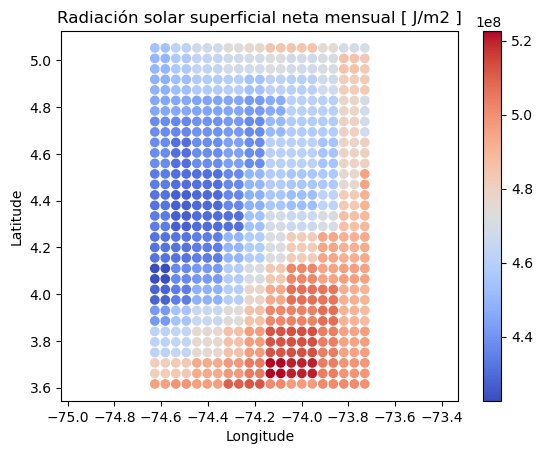

In [14]:
df = df_ERA5_radiacion
dic = ERA5_radiacion

min = df[dic.get('band')].min()
max = df[dic.get('band')].max()

fig, ax = plt.subplots()
im = ax.scatter(df['longitude'], df['latitude'], c=df[dic.get('band')], cmap='coolwarm')
ax.set_title(dic.get('variable')+dic.get('units'))
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.axis('equal')
#colobar and range
fig.colorbar(im, ax=ax)
im.set_clim(min, max)
# Show the plot
plt.show()

In [7]:
#velocidades u y v
df_ERA5_vu = collection_data(ERA5_velu, region, scale_value)
df_ERA5_velu = df_ERA5_vu.loc[df_ERA5_vu['date'] == ERA5_velu.get('start')] #primer valor de ejemplo

df_ERA5_vv = collection_data(ERA5_velv, region, scale_value)
df_ERA5_velv = df_ERA5_vv.loc[df_ERA5_vv['date'] == ERA5_velv.get('start')] #primer valor de ejemplo


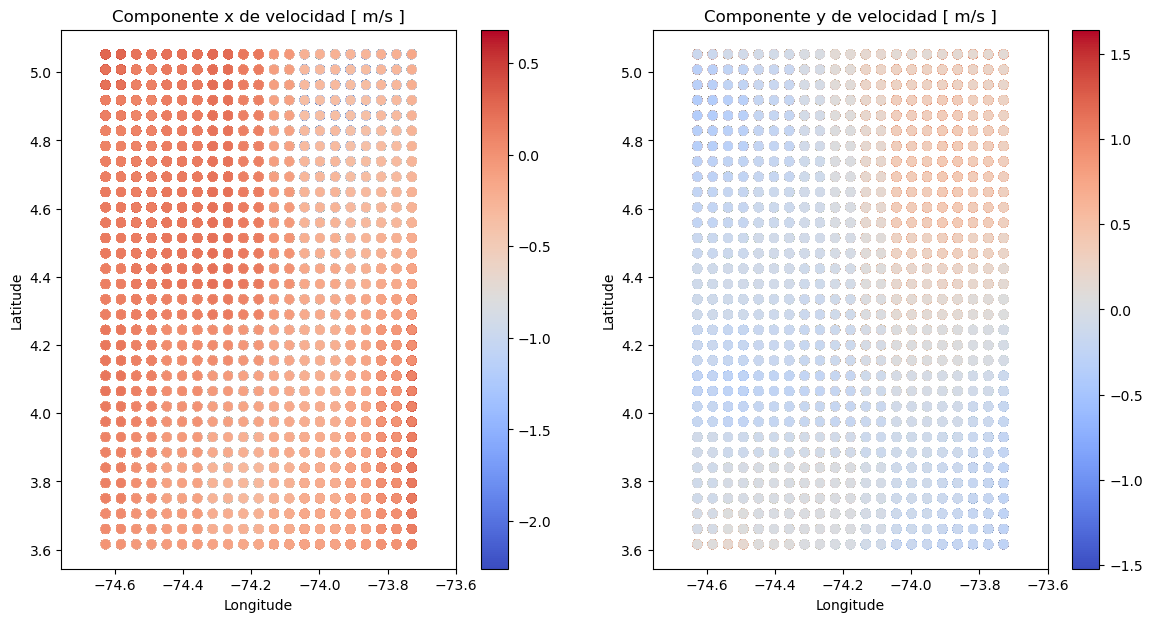

In [91]:
df = df_ERA5_vu
dic = ERA5_velu

df2 = df_ERA5_vv
dic2 = ERA5_velv

min = [df[dic.get('band')].min(), df2[dic2.get('band')].min()]
max = [df[dic.get('band')].max(), df2[dic2.get('band')].max()]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
im1 = ax1.scatter(df['longitude'], df['latitude'], c=df[dic.get('band')], cmap='coolwarm')
ax1.set_title(dic.get('variable')+dic.get('units'))
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.axis('equal')
#colobar and range
fig.colorbar(im1, ax=ax1)
im1.set_clim(min[0], max[0])

im2 = ax2.scatter(df2['longitude'], df2['latitude'], c=df2[dic2.get('band')], cmap='coolwarm')
ax2.set_title(dic2.get('variable')+dic2.get('units'))
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.axis('equal')
#colobar and range
fig.colorbar(im2, ax=ax2)
im2.set_clim(min[1], max[1])

# Show the plot
plt.show()

In [80]:
#precipitacion
df_ERA5_precipitacion = collection_data(ERA5_precipitacion, region, scale_value)
df_ERA5_preci = df_ERA5_precipitacion.loc[df_ERA5_precipitacion['date'] == ERA5_precipitacion.get('start')] #primer valor de ejemplo


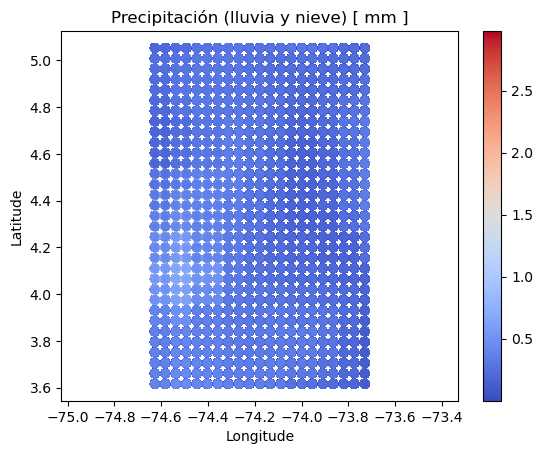

In [97]:
df = df_ERA5_precipitacion
dic = ERA5_precipitacion

min = df[dic.get('band')].min()
max = df[dic.get('band')].max()

fig, ax = plt.subplots()
im = ax.scatter(df['longitude'], df['latitude'], c=df[dic.get('band')], cmap='coolwarm')
ax.set_title(dic.get('variable')+dic.get('units'))
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.axis('equal')
#colobar and range
fig.colorbar(im, ax=ax)
im.set_clim(min, max)
# Show the plot
plt.show()

In [9]:
#presion
df_ERA5_presion = collection_data(ERA5_presion, region, scale_value)
df_ERA5_pres = df_ERA5_presion.loc[df_ERA5_presion['date'] == ERA5_presion.get('start')] #primer valor de ejemplo


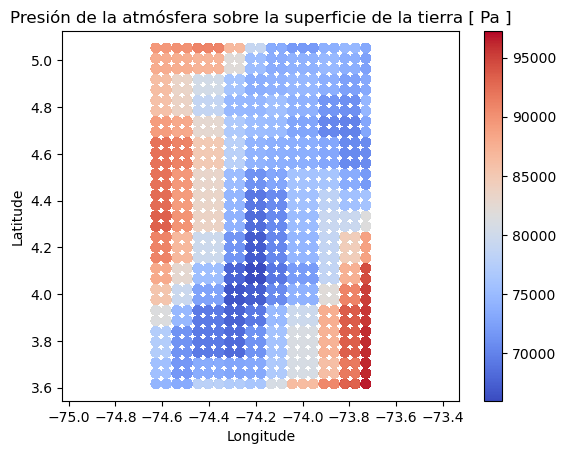

In [96]:
df = df_ERA5_presion
dic = ERA5_presion

min = df[dic.get('band')].min()
max = df[dic.get('band')].max()

fig, ax = plt.subplots()
im = ax.scatter(df['longitude'], df['latitude'], c=df[dic.get('band')], cmap='coolwarm')
ax.set_title(dic.get('variable')+dic.get('units'))
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.axis('equal')
#colobar and range
fig.colorbar(im, ax=ax)
im.set_clim(min, max)
# Show the plot
plt.show()

In [10]:
#temperaturas
df_ERA5_temp_2m = collection_data(ERA5_temp_2m, region, scale_value)
df_ERA5_t2m = df_ERA5_temp_2m.loc[df_ERA5_temp_2m['date'] == ERA5_temp_2m.get('start')] #primer valor de ejemplo

df_ERA5_temp_sup = collection_data(ERA5_temp_sup, region, scale_value)
df_ERA5_tsup = df_ERA5_temp_sup.loc[df_ERA5_temp_sup['date'] == ERA5_temp_sup.get('start')] #primer valor de ejemplo


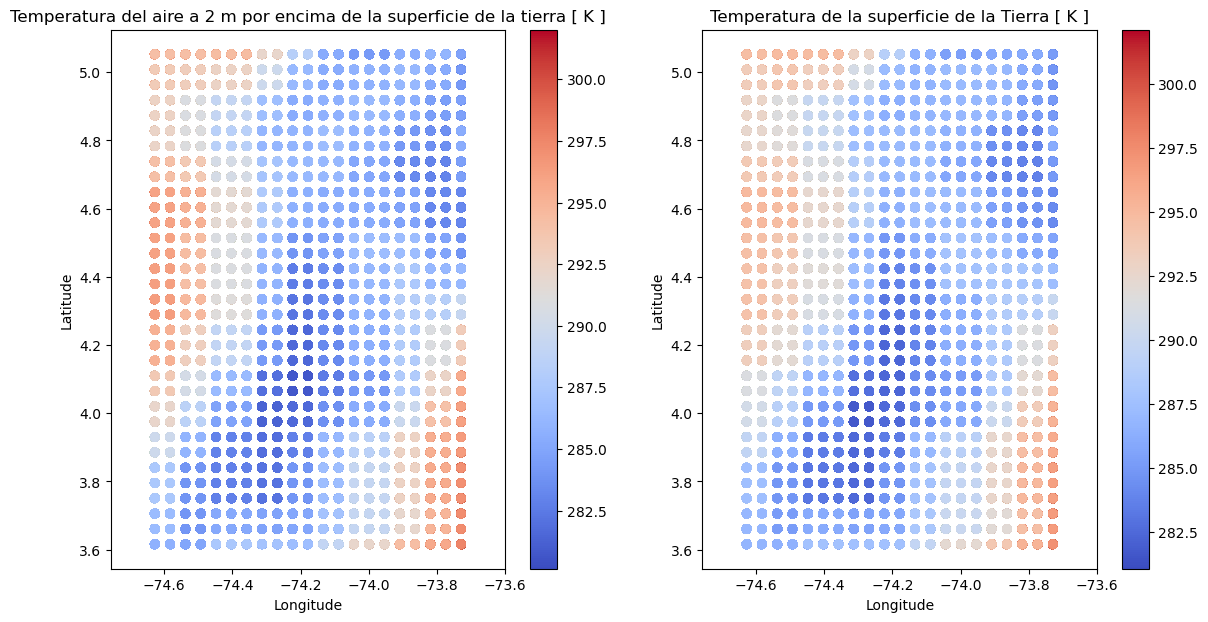

In [94]:
df = df_ERA5_temp_2m
dic = ERA5_temp_2m

df2 = df_ERA5_temp_sup
dic2 = ERA5_temp_sup

min = [df[dic.get('band')].min(), df2[dic2.get('band')].min()]
max = [df[dic.get('band')].max(), df2[dic2.get('band')].max()]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
im1 = ax1.scatter(df['longitude'], df['latitude'], c=df[dic.get('band')], cmap='coolwarm')
ax1.set_title(dic.get('variable')+dic.get('units'))
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.axis('equal')
#colobar and range
fig.colorbar(im1, ax=ax1)
im1.set_clim(min[0], max[0])

im2 = ax2.scatter(df2['longitude'], df2['latitude'], c=df2[dic2.get('band')], cmap='coolwarm')
ax2.set_title(dic2.get('variable')+dic2.get('units'))
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.axis('equal')
#colobar and range
fig.colorbar(im2, ax=ax2)
im2.set_clim(min[1], max[1])

# Show the plot
plt.show()

# Idaho
## Extracción de datos

In [ ]:
#IDAHO Vel del viento
df_ERA5_vu = collection_data(ERA5_velu, region, scale_value)
df_ERA5_velu = df_ERA5_vu.loc[df_ERA5_vu['date'] == ERA5_velu.get('start')] #primer valor de ejemplo

In [ ]:
Solarcast_vel = {
    'source' : 'projects/ee-seforeros/assets/PVOUT',
    'variable' : 'Potencial de energía fotovoltaica',
    'units' : ' [ kWh ]',
    'max_value' : 1000,
    'min_value' : 2000,
    'start' : '2018-03-01',
    'end' : '2018-04-01'
}

In [ ]:
df_ERA5_rad.to_csv('ERA5_radiacion.csv', header=True, index=False)

In [8]:
df_ERA5_vu.to_csv('ERA5_vel_u.csv', header=True, index=False)
df_ERA5_vv.to_csv('ERA5_vel_v.csv', header=True, index=False)

In [11]:
df_ERA5_presion.to_csv('ERA5_presion_sup.csv', header=True, index=False)
df_ERA5_temp_sup.to_csv('ERA5_temp_superficial.csv', header=True, index=False)
df_ERA5_temp_2m.to_csv('ERA5_temp_2m.csv', header=True, index=False)
#df_ERA5_precipitacion.to_csv('ERA5_precipitacion.csv', header=True, index=False)